In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import welly
import os
env = %env
from welly import Well
import lasio

In [2]:
import pandas as pd
picks_dic = pd.read_csv('./SPE_006_originalData/OilSandsDB/PICKS_DIC.TXT',delimiter='\t')
picks = pd.read_csv('./SPE_006_originalData/OilSandsDB/PICKS.TXT',delimiter='\t')
wells = pd.read_csv('./SPE_006_originalData/OilSandsDB/WELLS.TXT',delimiter='\t')
picks_new=picks[picks['HorID']==13000]
df_new=pd.merge(wells, picks_new, on='SitID')
df_new.head()

,SitID,UWI (AGS),UWI,HorID,Pick,Quality
0,102496,0674010812000,00/12-08-067-01W4/0,13000,475,3
1,102497,0674020807000,00/07-08-067-02W4/0,13000,515,3
2,102498,0674021109000,00/09-11-067-02W4/0,13000,480,3
3,102500,0674022910000,00/10-29-067-02W4/0,13000,549,3
4,102501,0674023406000,00/06-34-067-02W4/0,13000,529,2


In [10]:
import glob
count=0
data_df=pd.DataFrame()
for file in glob.glob('./SPE_006_originalData/OilSandsDB/Logs/*.LAS'):
    if count >300:
        break
    count+=1  
    l_df = lasio.read(file).df()
   
    str_uwi= file[-23:-4].replace("-", "/",1)[:17]+file[-6:-4].replace("-", "/",1)
#    print (str_uwi)
    l_df = l_df.reset_index()
    l_df['UWI'] = str_uwi
    l_df['SitID']=df_new[df_new['UWI']==str_uwi]['SitID'].iloc[0]
    l_df['UWI (AGS)']=df_new[df_new['UWI']==str_uwi]['UWI (AGS)'].iloc[0]
    l_df['Pick']=df_new[df_new['UWI']==str_uwi]['Pick'].iloc[0] 
    l_df['HorID']=df_new[df_new['UWI']==str_uwi]['HorID'].iloc[0]
    l_df['Quality']=df_new[df_new['UWI']==str_uwi]['Quality'].iloc[0]
    print("got to end of col append & pick is ",l_df.Pick.unique()[0])  
    try:
        float(l_df.Pick.unique()[0])
        l_df.Pick = l_df.Pick.astype(float)
        l_df.DEPT = l_df.DEPT.astype(float)
        l_df['new_pick']=l_df['Pick']-l_df['DEPT']
        l_df['new_pick2']=l_df['new_pick'].apply(lambda x: 1 if(x==0) else 0)
        if count == 1:
            data_df=l_df
        if count >= 2:
            data_df=pd.concat([data_df, l_df])      
    except:
        print ('Error picking')
        continue;
        
      

607
        
Error picking
243
631
253
411
441
535
429
454
263
602
220.5
435
441
421.5
327.96
        
Error picking
416
        
Error picking
591
456
808.02
        
Error picking
806.5
596
519
568
362.5
        
Error picking
309.5
477
593.5
        
Error picking
372
480
580
368.5
474.5
493
455
450
329
588.87
220.5
        
Error picking
327
475
283
422
471
642
531
        
Error picking
473
596.5
149.96
355.5
323.5
294
425
541
180.5
396.24
465
474
410
231.5
556.5
        
Error picking
        
Error picking
449
636
487
468
365.46
        
Error picking
473.66
416
269
361.9
        
Error picking
282
        
Error picking
436
370.64
274
697
774.19
628.5
283
        
Error picking
        
Error picking
442.5
        
Error picking
728.47
437
336
424.28
        
Error picking
408.43
253
470
        
Error picking
433
245
        
Error picking
        
Error picking
        
Error picking
580
460
        
Error picking
843
451.5
475
291
256
        
Error picking
334.37
471
235
43

In [11]:
data_df.shape

(219189, 16)

In [12]:
len(data_df.UWI.unique())

256

In [7]:
data_df.head()

,CALI,DELT,DEPT,DPHI,GR,HorID,ILD,NPHI,Pick,Quality,RHOB,SitID,UWI,UWI (AGS),new_pick,new_pick2
0,238.379,NaN,390.00,0.199,82.478,13000,2.923,0.457,607.0,1,NaN,142218,00/01-01-073-05W5/0,0735050101000,217.00,0
1,238.331,NaN,390.25,0.208,86.413,13000,2.925,0.456,607.0,1,NaN,142218,00/01-01-073-05W5/0,0735050101000,216.75,0
2,238.069,NaN,390.50,0.246,90.229,13000,2.917,0.452,607.0,1,NaN,142218,00/01-01-073-05W5/0,0735050101000,216.50,0
3,238.752,NaN,390.75,0.266,90.944,13000,2.898,0.475,607.0,1,NaN,142218,00/01-01-073-05W5/0,0735050101000,216.25,0
4,239.724,NaN,391.00,0.287,88.866,13000,2.890,0.484,607.0,1,NaN,142218,00/01-01-073-05W5/0,0735050101000,216.00,0


In [6]:
features = ['CALI','DEPT','DPHI','GR','ILD','NPHI', 'SitID']
label = 'new_pick2'
train_X = data_df[features]
train_y = data_df[label]

In [44]:
feature_ppt = ['DEPT','DPHI','GR','ILD','NPHI', 'SitID', 'new_pick2']
train_X3=data_df[feature_ppt]

In [45]:
train_X3=train_X3.rename(columns = {'new_pick2':'Pick'})

In [121]:
from xgboost.sklearn import XGBRegressor
model = XGBRegressor()
model.fit(train_X, train_y)
result= model.predict(train_X)
result

array([ -2.83718109e-05,  -2.83718109e-05,  -2.83718109e-05, ...,
         4.79936600e-04,   4.79936600e-04,   4.39882278e-04], dtype=float32)

In [3]:
from xgboost import plot_importance
plot_importance(model)

NameError: name 'model' is not defined

In [126]:
max(data_df_pred[data_df_pred['SitID']==111771]['Pick_pred'])

0.0036689937

In [127]:
idx = data_df_pred.groupby(['SitID'])['Pick_pred'].transform(max) == data_df_pred['Pick_pred']
df_pred1=data_df_pred[idx]

In [128]:
df_pred1.shape

(2390, 29)

In [129]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(df_pred1['DEPT'],df_pred1['Pick']))

157.47561076276824

In [148]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import auc

/home/ubuntu/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [130]:
display= ['CALI','DEPT','DPHI','GR','NPHI', 'SitID']
df_display=train_X[display]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9169e87a20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f917c27f630>]], dtype=object)

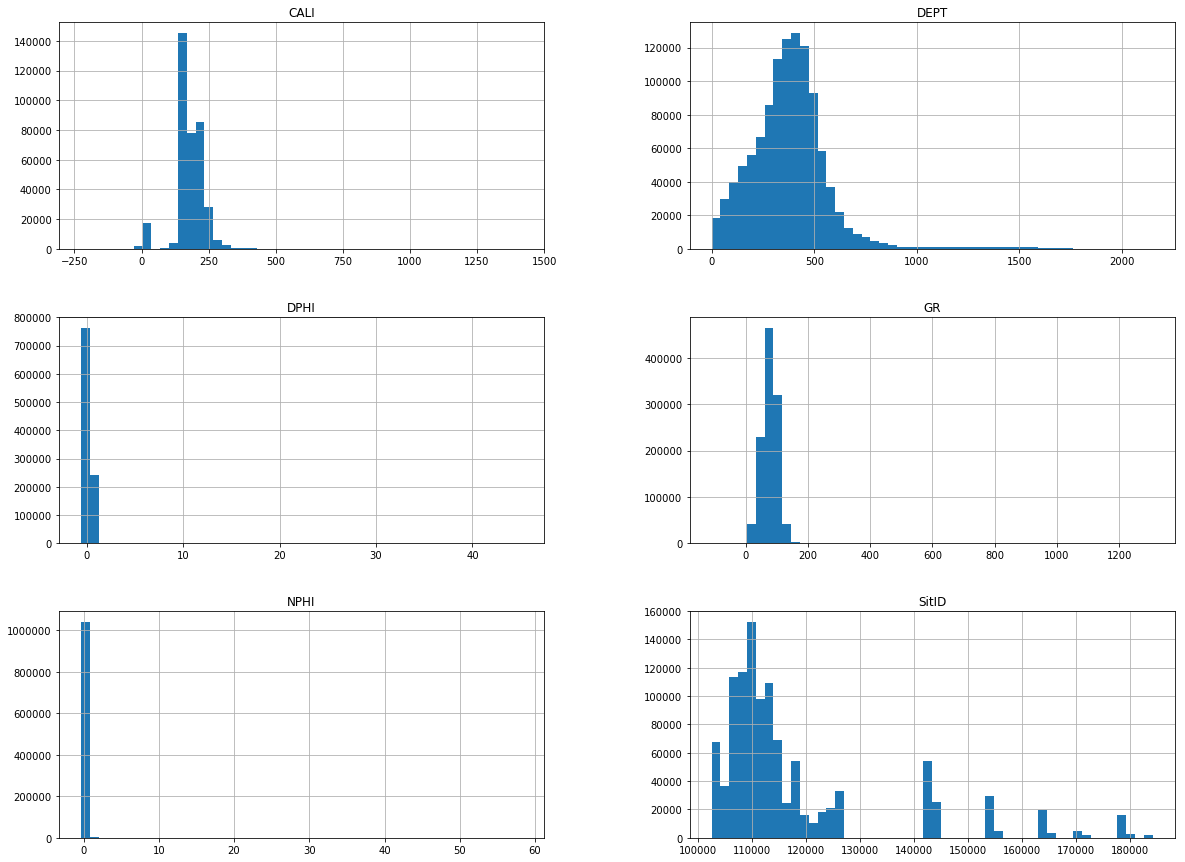

In [131]:
import matplotlib.pyplot as plt
% matplotlib inline
df_display.hist(bins=50, figsize=(20,15))

In [18]:
def derivative(well_df,rangeOfCurves):
   well_der = pd.DataFrame(well_df['DEPT'])
   for eachC in rangeOfCurves:
       # make a placeholder array for results
       log_der= []
       log_der = np.gradient(well_df[eachC])
       col_name= eachC+'der'
       well_der[col_name]=log_der
   return well_der

In [19]:
#features = ['CALI','DEPT','DPHI','GR','ILD','NPHI', 'SitID']
test_df=derivative(data_df,['GR'])
test1_df=derivative(data_df,['CALI'])
test2_df=derivative(data_df,['DPHI'])
test3_df=derivative(data_df,['NPHI'])
test4_df=derivative(data_df,['ILD'])

In [20]:
data_df['GRder']=test_df['GRder']
data_df['CALIder']=test1_df['CALIder']
data_df['DPHIder']=test2_df['DPHIder']
data_df['NPHIder']=test3_df['NPHIder']
data_df['ILDder']=test4_df['ILDder']

In [140]:
features2 = ['CALI','DEPT','DPHI','GR','ILD','NPHI', 'SitID','CALIder','DPHIder','GRder','ILDder']
label = 'new_pick2'
train_X2 = data_df[features2]
train_y = data_df[label]

In [141]:
from xgboost.sklearn import XGBRegressor
model2 = XGBRegressor()
model2.fit(train_X2, train_y)
result2= model2.predict(train_X2)
result2

array([ -1.41441822e-04,  -1.41441822e-04,  -1.41441822e-04, ...,
         4.46438789e-05,   1.50501728e-05,   4.96506691e-05], dtype=float32)

In [142]:
data_df_pred['Pick_pred2'] = result2

In [143]:
idx2 = data_df_pred.groupby(['SitID'])['Pick_pred2'].transform(max) == data_df_pred['Pick_pred2']
df_pred2=data_df_pred[idx2]

In [144]:
df_pred2.shape()

(1453, 30)

In [145]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(df_pred2['DEPT'],df_pred2['Pick']))

160.11968072969904

In [83]:
well_data=data_df.copy()

In [84]:
well_data.shape

(1494792, 41)

In [85]:
id_array = well_data['SitID'].unique()
id_array_permutation = np.random.permutation(id_array)
train_index = id_array_permutation[:int(len(id_array)*.8)]
test_index = id_array_permutation[int(len(id_array)*.8)+1:]
train_df = well_data.loc[well_data['SitID'].isin(train_index)]
test_df = well_data.loc[well_data['SitID'].isin(test_index)]

In [10]:
#features3 = ['DEPT', 'ILD', 'DPHI','GR', 'NPHI']
#label = 'Pick'

In [86]:
features = ['CALI','DEPT','DPHI','GR','ILD','NPHI']
label = 'new_pick2'

In [87]:
seed = 123

In [88]:
from sklearn.metrics import mean_squared_error

In [89]:
from xgboost.sklearn import XGBRegressor
#params_final = (
#    gamma=0, 
#    alpha=0.2, 
#    maxdepth=3, 
#    subsample=0.8, 
#    colsamplebytree= 0.8, 
#    n_estimators= 100, 
#    learningrate= 0.1, 
#    minchildweight= 1
#)
train_X = train_df[features]
train_y = train_df[label]
test_X = test_df[features]
test_y = test_df[label]

In [90]:
model = XGBRegressor(
    gamma=0, 
    reg_alpha=0.2, 
    max_depth=3, 
    subsample=0.8, 
    colsample_bytree= 0.8, 
    n_estimators= 300, 
    learning_rate= 0.03, 
    min_child_weight= 3)
model.fit(train_X,train_y)
result = model.predict(test_X)
result

array([  6.19292259e-05,   6.19292259e-05,   6.19292259e-05, ...,
         5.29766083e-04,   5.39302826e-04,   5.39302826e-04], dtype=float32)

In [91]:
test_df_pred = test_df.copy()
test_df_pred['Pick_pred'] = result
test_df_pred.head()

,CALI,COND,DELT,DEPT,DPHI,DPHI:1,DPHI:2,DT,GR,GR:1,...,UWI,UWI (AGS),new_pick,new_pick2,GRder,CALIder,DPHIder,NPHIder,ILDder,Pick_pred
0,NaN,NaN,NaN,320.00,0.241,NaN,NaN,NaN,104.886,NaN,...,00/06-30-071-09W4/0,0714093006000,173.00,0,32.4105,NaN,0.0930,0.1595,-13.4035,0.000062
1,NaN,NaN,NaN,320.25,0.243,NaN,NaN,NaN,106.053,NaN,...,00/06-30-071-09W4/0,0714093006000,172.75,0,0.3130,NaN,-0.0010,0.0045,-0.0770,0.000062
2,NaN,NaN,NaN,320.50,0.239,NaN,NaN,NaN,105.512,NaN,...,00/06-30-071-09W4/0,0714093006000,172.50,0,-1.0905,NaN,-0.0165,0.0125,-0.0160,0.000062
3,NaN,NaN,NaN,320.75,0.210,NaN,NaN,NaN,103.872,NaN,...,00/06-30-071-09W4/0,0714093006000,172.25,0,-2.7690,NaN,-0.0125,0.0105,0.0320,0.000018
4,NaN,NaN,NaN,321.00,0.214,NaN,NaN,NaN,99.974,NaN,...,00/06-30-071-09W4/0,0714093006000,172.00,0,-2.8300,NaN,0.0070,0.0010,0.0465,0.000045


In [92]:
idx = test_df_pred.groupby(['SitID'])['Pick_pred'].transform(max) == test_df_pred['Pick_pred']
test_df_pred2=test_df_pred[idx]
        
        
# Score
final_score = np.sqrt(mean_squared_error(test_df_pred2['DEPT'],test_df_pred2['Pick']))
print("Prediction RMSE: {}".format(final_score))

Prediction RMSE: 136.921949194076


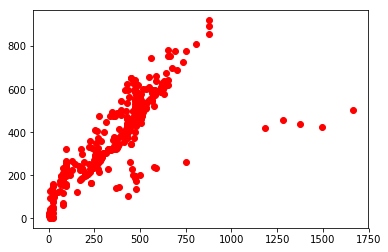

In [114]:
plt.plot(test_df_pred2['DEPT'],test_df_pred2['Pick'], 'ro')

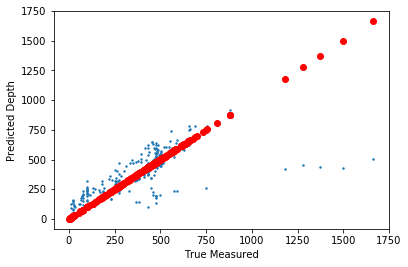

In [123]:
plt.scatter(test_df_pred2['DEPT'],test_df_pred2['Pick'], s=2)
plt.plot(test_df_pred2['DEPT'],test_df_pred2['DEPT'], 'ro')
#plt.plot([Y_all.min(), Y_all.max()], [Y_all.min(), Y_all.max()], 'k--', lw=2)
plt.xlabel('True Measured')
plt.ylabel('Predicted Depth')

In [94]:
display=['DEPT','Pick','SitID','UWI']
test_df_pred3=test_df_pred2[display]

In [96]:
test_df_pred3

,DEPT,Pick,SitID,UWI
736,504.000,493.00,106489,00/06-30-071-09W4/0
188,377.000,490.50,102592,00/07-25-067-05W4/0
742,460.500,456.00,111040,00/10-33-078-11W4/0
371,266.301,322.00,112371,00/11-29-080-16W4/0
744,556.000,556.00,109340,00/11-02-075-21W4/0
58,691.156,779.68,110028,00/06-36-076-25W4/0
307,753.406,779.68,110028,00/06-36-076-25W4/0
26,21.500,136.50,121444,AA/16-12-093-13W4/0
740,438.917,404.16,112356,00/10-20-080-14W4/0
467,256.958,312.72,110334,00/11-07-077-06W4/0


In [97]:
r = Well.from_las('./SPE_006_originalData/OilSandsDB/Logs/00-10-20-080-14W4-0.LAS')

In [98]:
r00

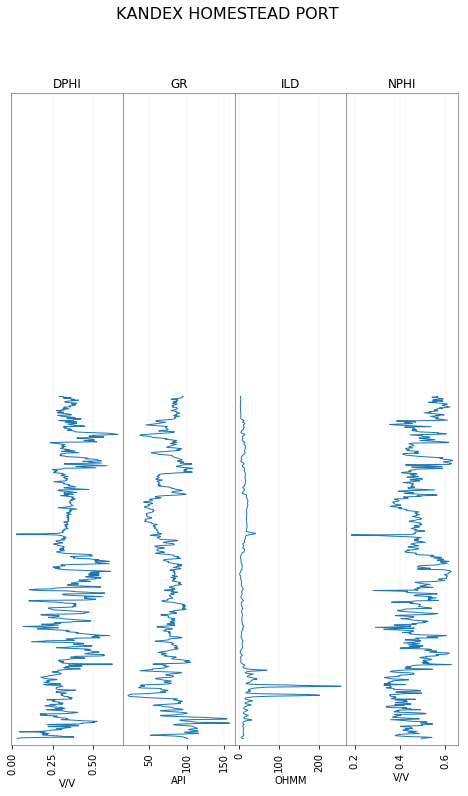

In [104]:
tracks = [ 'DPHI', 'GR', 'ILD', 'NPHI']
r.plot(tracks=tracks)

In [37]:
well_data=data_df.copy()

In [106]:
import lasio
l = lasio.read("./SPE_006_originalData/OilSandsDB/Logs/00-10-20-080-14W4-0.LAS")
l

In [110]:
l_df

,DEPT,GR,CALI,DPHI,ILD,UWI,SitID,UWI (AGS),Pick,HorID,Quality,new_pick,new_pick2
0,30.48,85.425,170.590,0.215,63.483,AA/06-36-090-09W4/0,118153,0904093606AA0,114.6,13000,1,84.12,0
1,30.73,84.199,169.585,0.224,49.541,AA/06-36-090-09W4/0,118153,0904093606AA0,114.6,13000,1,83.87,0
2,30.98,87.275,167.554,0.230,53.442,AA/06-36-090-09W4/0,118153,0904093606AA0,114.6,13000,1,83.62,0
3,31.23,96.496,162.433,0.238,63.407,AA/06-36-090-09W4/0,118153,0904093606AA0,114.6,13000,1,83.37,0
4,31.48,112.478,157.290,0.247,63.384,AA/06-36-090-09W4/0,118153,0904093606AA0,114.6,13000,1,83.12,0
5,31.73,106.336,155.258,0.253,47.620,AA/06-36-090-09W4/0,118153,0904093606AA0,114.6,13000,1,82.87,0
6,31.98,105.725,154.254,0.256,35.101,AA/06-36-090-09W4/0,118153,0904093606AA0,114.6,13000,1,82.62,0
7,32.23,119.863,154.308,0.265,34.420,AA/06-36-090-09W4/0,118153,0904093606AA0,114.6,13000,1,82.37,0
8,32.48,127.241,154.341,0.269,38.568,AA/06-36-090-09W4/0,118153,0904093606AA0,114.6,13000,1,82.12,0
9,32.73,113.723,156.481,0.259,40.828,AA/06-36-090-09W4/0,118153,0904093606AA0,114.6,13000,1,81.87,0


In [36]:
features2 = ['CALI','DEPT','DPHI','GR','ILD','NPHI','CALIder','DPHIder','GRder','ILDder']
label = 'new_pick2'

In [48]:
from xgboost.sklearn import XGBRegressor
#params_final = (
#    gamma=0, 
#    alpha=0.2, 
#    maxdepth=3, 
#    subsample=0.8, 
#    colsamplebytree= 0.8, 
#    n_estimators= 100, 
#    learningrate= 0.1, 
#    minchildweight= 1
#)
train_X = train_df[features2]
train_y = train_df[label]
test_X = test_df[features2]
test_y = test_df[label]

In [49]:
model2 = XGBRegressor(
    gamma=0, 
    reg_alpha=0.2, 
    max_depth=3, 
    subsample=0.8, 
    colsample_bytree= 0.8, 
    n_estimators= 300, 
    learning_rate= 0.03, 
    min_child_weight= 3)
model2.fit(train_X,train_y)
result2 = model2.predict(test_X)
result2

array([ 0.00188521,  0.00092727,  0.00097615, ...,  0.00025219,
        0.00050485,  0.00075358], dtype=float32)

In [50]:
test_df_pred = test_df.copy()
test_df_pred['Pick_pred2'] = result2
test_df_pred.head()

,CALI,COND,DELT,DEPT,DPHI,DPHI:1,DPHI:2,DT,GR,GR:1,...,UWI,UWI (AGS),new_pick,new_pick2,GRder,CALIder,DPHIder,NPHIder,ILDder,Pick_pred2
0,NaN,NaN,NaN,106.680,0.239,NaN,NaN,NaN,104.506,NaN,...,00/11-11-081-03W4/0,0814031111000,117.960,0,46.2715,NaN,0.0625,0.1475,-2.7845,0.001885
1,NaN,NaN,NaN,106.985,0.217,NaN,NaN,NaN,104.513,NaN,...,00/11-11-081-03W4/0,0814031111000,117.655,0,0.0080,NaN,0.0035,0.0010,1.0450,0.000927
2,NaN,NaN,NaN,107.290,0.246,NaN,NaN,NaN,104.522,NaN,...,00/11-11-081-03W4/0,0814031111000,117.350,0,-0.9145,NaN,0.0245,-0.0235,1.1490,0.000976
3,NaN,NaN,NaN,107.594,0.266,NaN,NaN,NaN,102.684,NaN,...,00/11-11-081-03W4/0,0814031111000,117.046,0,-6.1385,NaN,0.0150,-0.0210,1.2380,0.001669
4,NaN,NaN,NaN,107.899,0.276,NaN,NaN,NaN,92.245,NaN,...,00/11-11-081-03W4/0,0814031111000,116.741,0,-7.9820,NaN,-0.0010,-0.0060,0.8790,0.001450


In [51]:
idx = test_df_pred.groupby(['SitID'])['Pick_pred2'].transform(max) == test_df_pred['Pick_pred2']
test_df_pred2=test_df_pred[idx]
        
        
# Score
final_score = np.sqrt(mean_squared_error(test_df_pred2['DEPT'],test_df_pred2['Pick']))
print("Prediction RMSE: {}".format(final_score))

Prediction RMSE: 162.07304617844164
